# UNIT 7. Classification

This Unit includes main introduction to classification in machine learning, strongly based in {cite:p}`kroese2020`.

```{bibliography}
:style: unsrt
```

# Naive Bayes

In naive Bayes, the value of the overall function $g$ depends on the product of the function $g$ for each feature. Thus, the classification is done by choosing the highset $g$ value. 

For example, below we assume we have three features with different means $\mu$ and standard deviations $\sigma$. How can a given vector of features $\uvec{x}$ be classified?

In [1]:
""" naiveBayes.py """
import numpy as np
x = np.array([1.67,2,4.23]).reshape((1,3))
mu = np.array([1.6, 2.4, 4.3,
               1.5, 2.9, 6.1,
               1.8, 2.5, 4.2,
               1.1, 3.1, 5.6]).reshape((4,3))
sig = np.array([0.1, 0.5, 0.2,
                0.2, 0.6, 0.9,
                0.3, 0.3, 0.3,
                0.2, 0.7, 0.3]).reshape((4,3))
f = lambda y: 1/np.prod(sig[y,:]) * np.exp(
      -0.5*np.sum((x-mu[y,:])**2/sig[y,:]**2));
for y in range(0,4):
    print('{:3.2e}'.format(f(y)))

5.35e+01
2.42e-01
8.37e+00
3.53e-06


# Linear and quadratic discriminant analysis

Built on the above Bayesian approach, and after some mathematical manipulation, one can draw the lines that discriminate between two groups. This is called the decison boundary, that is quadratic for two given normal distributions but becomes linear if the distributions have the same covariance matrix.

See tha case for a LDA below, with the same $\sigma$ for two underlying normal distributions:

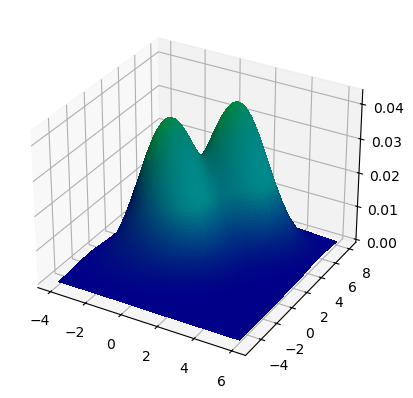

In [2]:
""" LDAmixture.py """

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LightSource

mu1 = np.array([0,0])
mu2 = np.array([2,4])
Sigma = np.array([[2,0.7],[0.7, 2]])
x, y = np.mgrid[-4:6:150j,-5:8:150j]
mvn1 = multivariate_normal( mu1, Sigma )
mvn2 = multivariate_normal( mu2, Sigma )

xy = np.hstack((x.reshape(-1,1),y.reshape(-1,1)))
z = 0.5*mvn1.pdf(xy).reshape(x.shape) +  0.5*mvn2.pdf(xy).reshape(x.shape)

# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
fig = plt.figure()

ax = fig.add_subplot(projection='3d')
ls = LightSource(azdeg=180, altdeg=65)
cols = ls.shade(z, plt.cm.winter)
surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, linewidth=0,
                       antialiased=False, facecolors=cols)
plt.savefig('LDApy.png',format='png',dpi=300, transparent=False)
plt.show()
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

or QDA if $\sigma_1\neq\sigma_2$:

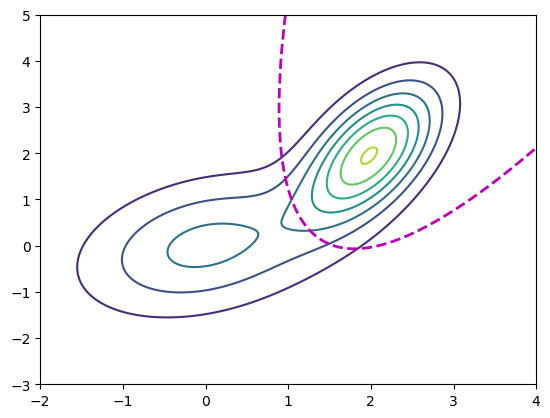

In [3]:
""" QDA.py """
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

mu1 = np.array([0,0])
mu2 = np.array([2,2])
Sigma1 = np.array([[1,0.3],[0.3, 1]])
Sigma2 = np.array([[0.3,0.3],[0.3, 1]])
x, y = np.mgrid[-2:4:150j,-3:5:150j]
mvn1 = multivariate_normal( mu1, Sigma1 )
mvn2 = multivariate_normal( mu2, Sigma2 )

xy = np.hstack((x.reshape(-1,1),y.reshape(-1,1)))
z = 0.5*mvn1.pdf(xy).reshape(x.shape) +  0.5*mvn2.pdf(xy).reshape(x.shape)
plt.contour(x,y,z)

z1 = 0.5*mvn1.pdf(xy).reshape(x.shape) -  0.5*mvn2.pdf(xy).reshape(x.shape)
plt.contour(x,y,z1, levels=[0],linestyles ='dashed', linewidths = 2, colors = 'm')

# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
plt.savefig('QDApy.pdf')
plt.show()
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

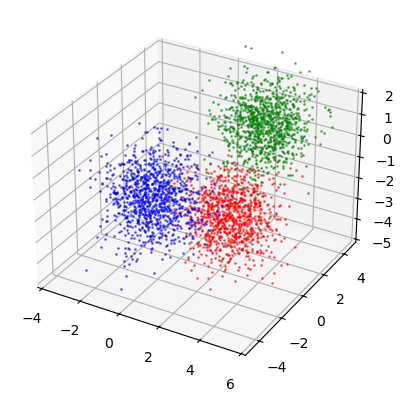

In [4]:
"""" datared.py """
import numpy as np
from numpy.random import randn
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

n=1000
mu1 = np.array([2,1,-3])
mu2 = np.array([1,-4,0])
mu3 = np.array([2,4,0])
X1 = randn(n,3) + mu1
X2 = randn(n,3) + mu2
X3 = randn(n,3) + mu3
fig = plt.figure()


# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
ax = fig.add_subplot(projection='3d',)
ax.plot(X1[:,0],X1[:,1],X1[:,2],'r.',alpha=0.5,markersize=2)
ax.plot(X2[:,0],X2[:,1],X2[:,2],'b.',alpha=0.5,markersize=2)
ax.plot(X3[:,0],X3[:,1],X3[:,2],'g.',alpha=0.5,markersize=2)
#ax.set_aspect("equal")


ax.set_xlim3d(-4,6)
ax.set_ylim3d(-5,5)
ax.set_zlim3d(-5,2)
plt.savefig('pcaproj1py.pdf')
plt.show()
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

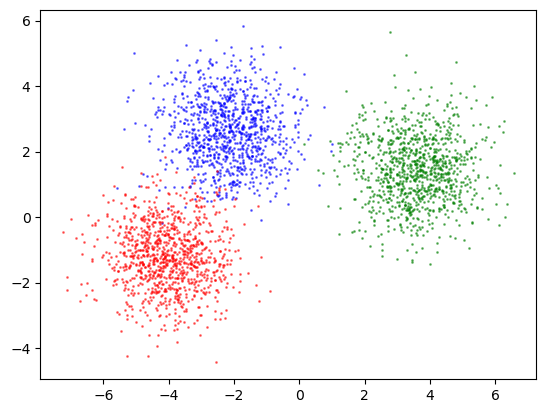

In [5]:
""" dataproj.py """
from numpy.linalg import svd, pinv
mu21 = (mu2 - mu1).reshape(3,1)
mu31 = (mu3 - mu1).reshape(3,1)
W = np.hstack((mu21, mu31))
U,_,_ = svd(W)  # we only need U
P = W @ pinv(W)
R = U.T @ P
RX1 = (R @ X1.T).T
RX2 = (R @ X2.T).T
RX3 = (R @ X3.T).T

# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
plt.plot(RX1[:,0],RX1[:,1],'b.',alpha=0.5,markersize=2)
plt.plot(RX2[:,0],RX2[:,1],'g.',alpha=0.5,markersize=2)
plt.plot(RX3[:,0],RX3[:,1],'r.',alpha=0.5,markersize=2)
plt.savefig('pcaproj2py.pdf')
plt.show()
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

# $K$-Nearest Neighbors Classification

![KNN](../figures/knn.png)

Figure adapted from [https://medium.com/swlh/k-nearest-neighbor-ca2593d7a3c4](here).

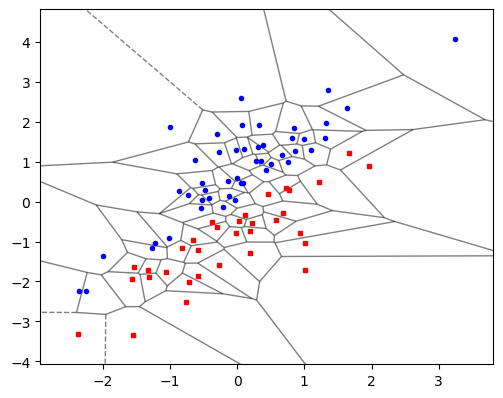

In [6]:
""" nearestnb.py """

import numpy as np
from numpy.random import rand,randn 
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

np.random.seed(12345)
M = 80 
x = randn(M,2)
y = np.zeros(M) # pre-allocate list

for i in range(M): 
    if rand()<0.5: 
        x[i,1], y[i] = x[i,0] + np.abs(randn()), 0
    else: 
        x[i,1], y[i] = x[i,0] - np.abs(randn()), 1

vor = Voronoi(x)   
plt_options = {'show_vertices':False, 'show_points':False, 'line_alpha':0.5}
fig = voronoi_plot_2d(vor, **plt_options)
plt.plot(x[y==0,0], x[y==0,1],'bo', 
         x[y==1,0], x[y==1,1],'rs', markersize=3)

# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
plt.tight_layout()
fig.set_size_inches(5,4)
plt.savefig('nearestnbpy.pdf',format='pdf')
plt.show()
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


# Suport vector machine

![SVM](../figures/SVM.png)
Figure adapted from [https://www.javatpoint.com/machine-learning-support-vector-machine-algorithm](here).

Here is a calculator of the support vectors for a given dataset, taken from [here](https://www.mltut.com/svm-implementation-in-python-from-scratch/). The data contains information about the purchase or not of an SUV (dependent variable) as a function of gender, age and estimated salary (explanatory or independent variables). We start by importing and visualizing the data, and we will prune the table eliminating userID and gender.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# data from https://www.kaggle.com/datasets/rakeshrau/social-network-ads
dataset = pd.read_csv('datasets/Social_Network_Ads.csv')
dataset.head


<bound method NDFrame.head of       User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]>

we separated the data into two tables for X and y

In [8]:
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values
print(X)
print(y)

[[    19  19000]
 [    35  20000]
 [    26  43000]
 [    27  57000]
 [    19  76000]
 [    27  58000]
 [    27  84000]
 [    32 150000]
 [    25  33000]
 [    35  65000]
 [    26  80000]
 [    26  52000]
 [    20  86000]
 [    32  18000]
 [    18  82000]
 [    29  80000]
 [    47  25000]
 [    45  26000]
 [    46  28000]
 [    48  29000]
 [    45  22000]
 [    47  49000]
 [    48  41000]
 [    45  22000]
 [    46  23000]
 [    47  20000]
 [    49  28000]
 [    47  30000]
 [    29  43000]
 [    31  18000]
 [    31  74000]
 [    27 137000]
 [    21  16000]
 [    28  44000]
 [    27  90000]
 [    35  27000]
 [    33  28000]
 [    30  49000]
 [    26  72000]
 [    27  31000]
 [    27  17000]
 [    33  51000]
 [    35 108000]
 [    30  15000]
 [    28  84000]
 [    23  20000]
 [    25  79000]
 [    27  54000]
 [    30 135000]
 [    31  89000]
 [    24  32000]
 [    18  44000]
 [    29  83000]
 [    35  23000]
 [    27  58000]
 [    24  55000]
 [    23  48000]
 [    28  79000]
 [    22  1800

We now select a training set with 80% of the data

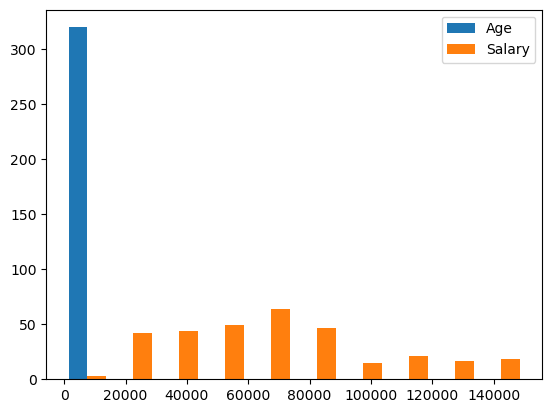

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
plt.hist(X_train)
plt.legend(['Age','Salary'])
plt.show()

We can see that the data does not have the same scales, so next, we need to scale the features to get normalized data:

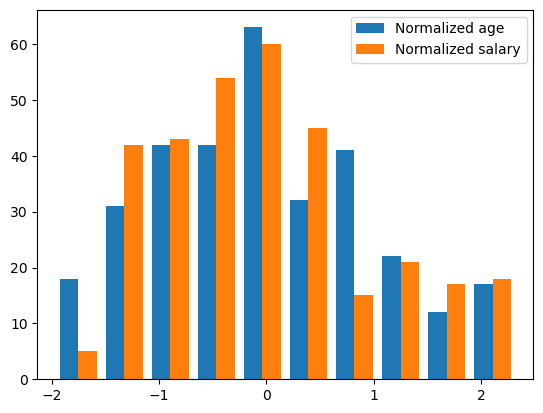

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
plt.hist(X_train)
plt.legend(['Normalized age','Normalized salary'])
plt.show()

We are now ready to fit the SVM to the data. The SVC class allows us to build a kernel SVM model (linear as well as non-linear). The default value of the kernel is the non-linear ‘rbf’.

In [11]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

After fitting the model, we move to predict the categories for the test cases using such model:

In [12]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1])

and we build the confusion matrix to see how well the prediction went

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[55  3]
 [ 1 21]]


0.95

Finally, we visualize the results

ValueError: 'red' is not a valid color value.

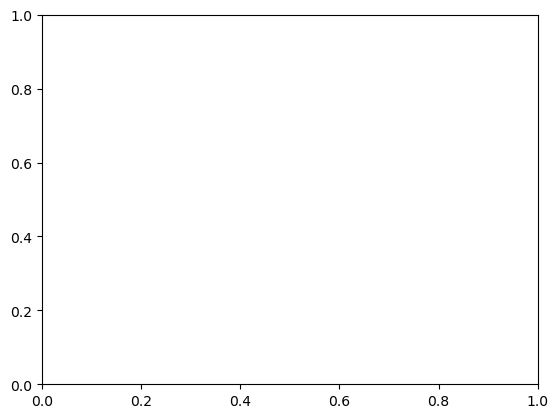

In [14]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [15]:
""" svmquad.py """
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
from sklearn.svm import SVC

data = genfromtxt('https://raw.githubusercontent.com/DSML-book/Programs/master/Chapter7/svmcirc.csv', delimiter=',') 
x = data[:,[0,1]] #vectors are rows
y = data[:,[2]].reshape(len(x),) #labels

tmp = np.sum(np.power(x,2),axis=1).reshape((len(x),1))
z = np.hstack((x,tmp))

#clf = SVC(C = np.inf, kernel='linear')
clf = SVC(C = 1000, kernel='linear')
clf.fit(z,y)

print("Support Vectors \n", clf.support_vectors_)
print("Support Vector Labels ",y[clf.support_])
print("Alpha ",clf.dual_coef_)
print("Bias ",clf.intercept_)

Support Vectors 
 [[ 0.038758    0.53796     0.29090314]
 [-0.49116    -0.20563     0.28352184]
 [-0.45068    -0.04797     0.20541358]
 [-0.061107   -0.41651     0.17721465]]
Support Vector Labels  [-1. -1.  1.  1.]
Alpha  [[ -46.49249413 -249.01807328  265.31805855   30.19250886]]
Bias  [5.617891]


Support Vectors 
 [[ 0.038758  0.53796 ]
 [-0.49116  -0.20563 ]
 [ 0.50858   0.15759 ]
 [-0.43742   0.38537 ]
 [ 0.34015  -0.57397 ]
 [-0.45068  -0.04797 ]
 [-0.40977  -0.17625 ]
 [ 0.028401  0.41137 ]]
Support Vector Labels  [-1. -1. -1. -1. -1.  1.  1.  1.]
Nu [[ -7.79068185 -68.11518916  -1.51725004  -7.03376815  -0.57034285
   15.2489841   60.1202509    9.65799706]]
Bias  [-3.9763643]


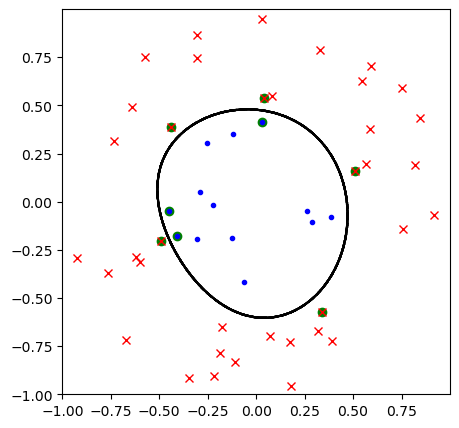

In [16]:
""" svmkern.py """
import numpy as np
from numpy import genfromtxt
from sklearn.svm import SVC
import matplotlib.pyplot as plt

def mykernel(U,V):    
    tmpU = np.sum(np.power(U,2),axis=1).reshape((len(U),1))
    U = np.hstack((U,tmpU))
    tmpV = np.sum(np.power(V,2),axis=1).reshape((len(V),1))
    V = np.hstack((V,tmpV))
    K = U @ V.T
    print(K.shape)
    return K

# read in the data
inp = genfromtxt('https://raw.githubusercontent.com/DSML-book/Programs/master/Chapter7/svmcirc.csv', delimiter=',')
data = inp[:,[0,1]] #vectors are rows
y = inp[:,[2]].reshape(len(data),) #labels

#clf = SVC(C = np.inf, kernel=mykernel, gamma='auto')
clf = SVC(C = 1000, kernel="rbf", gamma='scale')

clf.fit(data,y)


print("Support Vectors \n", clf.support_vectors_)
print("Support Vector Labels ",y[clf.support_])
print("Nu",clf.dual_coef_)
print("Bias ",clf.intercept_)

# plot
d = 0.001

fig = plt.figure(figsize=(5,5))

x_min, x_max = -1,1
y_min, y_max = -1,1
xx, yy = np.meshgrid(np.arange(x_min, x_max, d), np.arange(y_min, y_max, d))

plt.plot(data[clf.support_,0],data[clf.support_,1],'go')
plt.plot(data[y==1,0],data[y==1,1],'b.')
plt.plot(data[y==-1,0],data[y==-1,1],'rx')
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z,colors ="k")
plt.show()

# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
fig.savefig("rbf.pdf", bbox_inches='tight')
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

# Testing classifiers

Obtain data from the [UCI's Breast Cancer Wisconsin data set](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic).

Let us have a look at the data with the UCI's API:

In [17]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 
  
# metadata 
print(breast_cancer_wisconsin_diagnostic.metadata) 
  


{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'published_in': 'Electronic imaging', 'year': 1993, 'url': 'https://www.semanticscholar.org/paper/53

In [18]:
# variable information 
print(breast_cancer_wisconsin_diagnostic.variables) 


                  name     role         type demographic description units  \
0                   ID       ID  Categorical        None        None  None   
1            Diagnosis   Target  Categorical        None        None  None   
2              radius1  Feature   Continuous        None        None  None   
3             texture1  Feature   Continuous        None        None  None   
4           perimeter1  Feature   Continuous        None        None  None   
5                area1  Feature   Continuous        None        None  None   
6          smoothness1  Feature   Continuous        None        None  None   
7         compactness1  Feature   Continuous        None        None  None   
8           concavity1  Feature   Continuous        None        None  None   
9      concave_points1  Feature   Continuous        None        None  None   
10           symmetry1  Feature   Continuous        None        None  None   
11  fractal_dimension1  Feature   Continuous        None        

Let us use the direct import of the data in Python to run several classifiers to predict the category of breast masses (bening or malignant):

We create the training set (341 elements) and the test set (228 elements)

In [19]:
""" skclass1.py """
from numpy import genfromtxt
from sklearn.model_selection import train_test_split
# url = "https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic"
# name = "wdbc.data"
# data = genfromtxt(url + name,delimiter=',', dtype=str)
data = genfromtxt("datasets/wdbc.data",delimiter=',', dtype=str)
y = data[:,1] #responses 
X = data[:,2:].astype('float')#features as an ndarray matrix

X_train , X_test , y_train , y_test = train_test_split(
        X, y, test_size = 0.4, random_state = 1234)
print(X_train.shape,X_test.shape)

(341, 30) (228, 30)


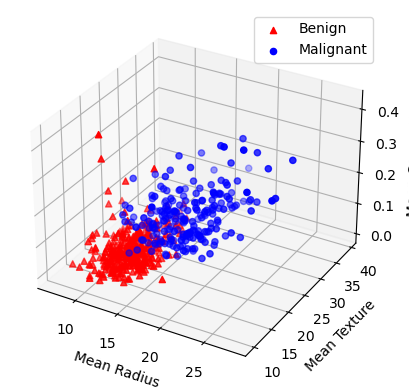

In [20]:
""" skclass2.py """
#from skclass1 import X, y
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

Bidx = np.where(y == 'B')
Midx= np.where(y == 'M')

# plot features Radius (column 0), Texture (1), Concavity (6)
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
ax.scatter(X[Bidx,0], X[Bidx,1], X[Bidx,6],
           c='r', marker='^', label='Benign')
ax.scatter(X[Midx,0], X[Midx,1], X[Midx,6],
           c='b', marker='o', label='Malignant')
ax.legend()
ax.set_xlabel('Mean Radius')
ax.set_ylabel('Mean Texture')
ax.set_zlabel('Mean Concavity')
plt.savefig('scatter_bcancer.pdf',format='pdf')
plt.show()

Here we will use severalclassifiers and report their accuracy (percentage of correct predictions). See how QDA perfomrs best for accuracy.

In [21]:
""" skclass3.py """
from sklearn.metrics import accuracy_score

import sklearn.discriminant_analysis as DA
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.neighbors import DistanceMetric
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
#import numpy as np
#from sklearn.preprocessing import MinMaxScaler

names = ["Logit","NBayes", "LDA", "QDA", "KNN", "SVM"]
#%% 
classifiers = [LogisticRegression(C=1e5),
               GaussianNB(), 
               DA.LinearDiscriminantAnalysis(),
               DA.QuadraticDiscriminantAnalysis(), 
               KNeighborsClassifier(n_neighbors=5),
               SVC(kernel='rbf', gamma = 1e-4)]
             
print('Name  Accuracy\n'+14*'-') 
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test) 
    print('{:6}  {:3.3f}'.format(name, accuracy_score(y_test,y_pred)))

Name  Accuracy
--------------
Logit   0.934
NBayes  0.908
LDA     0.943
QDA     0.956


/Users/jordivilla/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


KNN     0.925
SVM     0.939


# EX3: Accuracy metrics
Explore which other types of metrics provided by `sklearn` may give better appropriate measure for the breast cancer data classification with the different methods. Provide a jupyter notebook with the comparisons, plotting an image similar to this one (taken from the internet from data not related to this exercise at all) but including the methods discussed in the class notes:
![](https://i.stack.imgur.com/MPaJk.png)

# ROC curves

Adapted from [here](https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/).

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.903


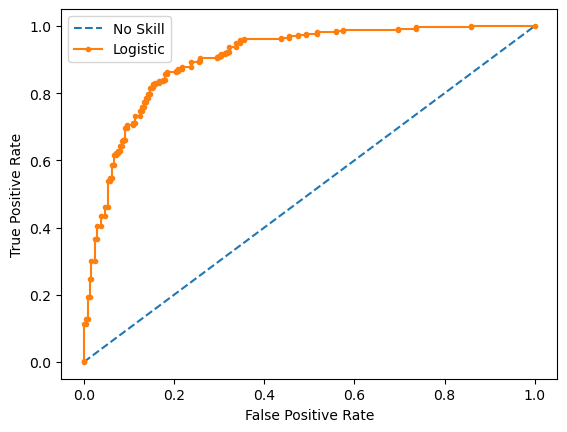

In [22]:
import matplotlib.pyplot as plt
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

And the following is an example of a precision-recall curve from the same source:

Logistic: f1=0.841 auc=0.898


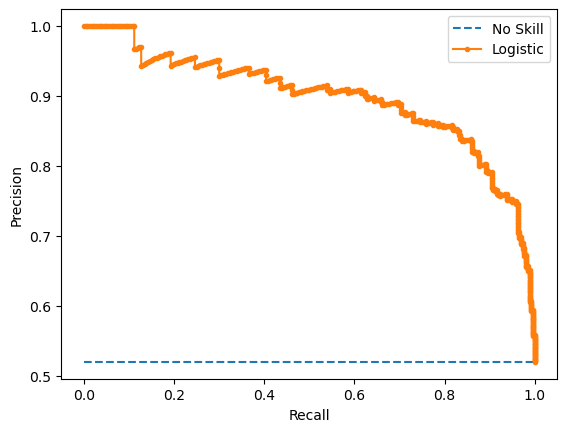

In [23]:
import matplotlib.pyplot as plt
# precision-recall curve and f1
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(testX)
lr_precision, lr_recall, _ = precision_recall_curve(testy, lr_probs)
lr_f1, lr_auc = f1_score(testy, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(testy[testy==1]) / len(testy)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()